# Régression binaire


## Importation des bibliothèques

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import time
from sklearn.model_selection import StratifiedKFold
import pickle
import joblib 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##  Chargement des données


In [23]:
with open("C:\\Users\\jeann\\Downloads\\donnees (1)\\simu.txt") as file:
    simu=file.read()
    print(simu)

X1 X2 Y
-1.68142693965664 -1.53481116656874 1
-0.69053246844984 0.710813637382892 1
4.67612494244737 -1.62476751486509 2
0.211525174273728 3.65768294112922 2
0.387863205482839 0.522407625318448 2
5.14519496064984 -1.84580494828943 2
1.38274861796761 -5.42067889225598 2
-3.7951837038196 -1.93104331768812 1
-2.06055855568058 6.13805655639845 1
-1.33698591029987 -1.68228726339319 1
3.67224539231838 -2.50799791755857 1
1.07944148117209 1.95884250833354 1
1.20231435178216 1.3238793745288 2
0.332048147835359 2.25488716977383 1
-1.66752340426222 -0.833925255466012 2
5.36073941040923 3.36796264877902 2
1.49355143468772 -3.51782658059403 2
-5.89985146988891 -0.146630303920977 1
2.10406770469106 -2.11242101165387 1
-1.4183742231838 2.04227591405155 2
-3.20347111796054 0.390020284206409 1
-0.653924743974885 3.32912424531041 2
-3.07801334492172 6.17550260694404 1
-2.18667368787342 0.421966595174952 1
-1.87511780354777 -1.60384995659515 1
-5.06007993222724 -2.47055017955611 1
2.51336113348357 -0.78

## Création d'une variable qui donne accès au chemin


In [24]:
file_path = ("C:\\Users\\jeann\\Downloads\\donnees (1)\\simu.txt")

## Stockage des données dans un dataframe 

In [25]:
df = pd.read_csv(file_path,delim_whitespace=True)

## Analyse des données

In [26]:
df.head()

,X1,X2,Y
0,-1.681427,-1.534811,1
1,-0.690532,0.710814,1
2,4.676125,-1.624768,2
3,0.211525,3.657683,2
4,0.387863,0.522408,2


In [27]:
df.info() #pas de valeur manquante 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   Y       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [28]:
df.describe() #resume statistiques descriptives 

,X1,X2,Y
count,2000.000000,2000.000000,2000.000000
mean,0.087890,-0.043909,1.414000
std,3.001684,2.955444,0.492672
min,-9.143583,-9.387265,1.000000
25%,-1.931862,-1.944058,1.000000
50%,0.086439,-0.074521,1.000000
75%,2.125775,1.945073,2.000000
max,10.171112,10.263284,2.000000


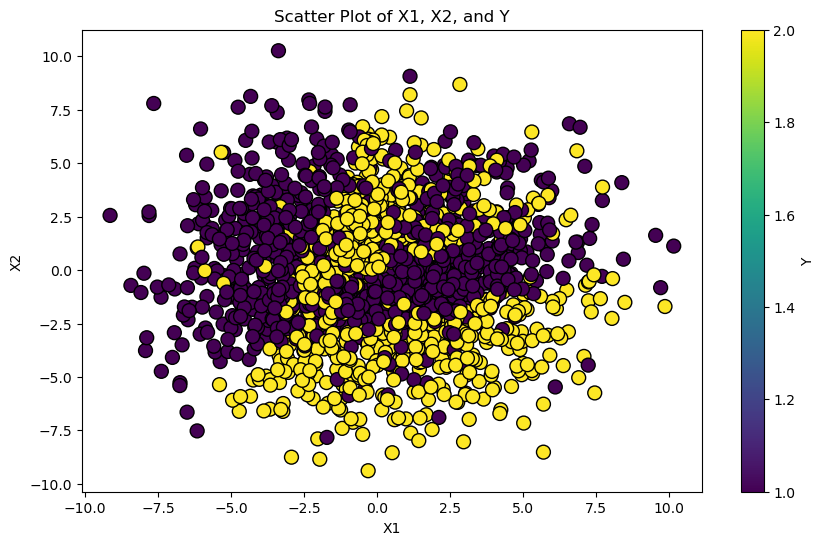

In [29]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['X1'], df['X2'], c=df['Y'], cmap='viridis', edgecolors='k', marker='o', s=100)
plt.title('Scatter Plot of X1, X2, and Y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Y')
plt.show()

## Entrainement des modèles 

In [30]:
# Séparation des variables explicatives et de la variables à expliquer
X = df[['X1', 'X2']]#features
y = df['Y'] #variable a predire 



In [31]:
# Standarisation des données afin de s'assurer que toutes les variables ont une échelle comparable
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Dictionnaire pour stocker les modèles et leurs noms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    }


##   Formation et évaluation des modèles

In [34]:
# Formation et évaluation des modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.665
              precision    recall  f1-score   support

           1       0.70      0.82      0.75       377
           2       0.57      0.41      0.48       223

    accuracy                           0.67       600
   macro avg       0.63      0.61      0.61       600
weighted avg       0.65      0.67      0.65       600

Decision Tree Accuracy: 0.7383333333333333
              precision    recall  f1-score   support

           1       0.79      0.79      0.79       377
           2       0.65      0.65      0.65       223

    accuracy                           0.74       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.74      0.74      0.74       600

Random Forest Accuracy: 0.8083333333333333
              precision    recall  f1-score   support

           1       0.84      0.85      0.85       377
           2       0.75      0.73      0.74       223

    accuracy                           0.81       600
   mac

In [35]:

# Initialisation de la validation croisée stratifiée
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionnaire pour stocker les résultats
model_results = {}


for name, model in models.items():
    start_time = time.time()  # Démarrer le chronomètre

    accuracies = []  # Liste pour stocker les scores de précision
    reports = []  # Liste pour stocker les rapports de classification

    # Boucle de validation croisée
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]  # Utiliser .iloc pour l'indexation basée sur la position
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        reports.append(classification_report(y_test, y_pred, output_dict=True))

    # Calcul de la précision moyenne et du temps d'exécution
    mean_accuracy = np.mean(accuracies)
    execution_time = time.time() - start_time

    # Stockage des résultats
    model_results[name] = {
        'Mean Accuracy': mean_accuracy,
        'Execution Time': execution_time,
        'Classification Report': np.mean([report['accuracy'] for report in reports])
    }

    # Affichage des résultats
    print(f'{name} -- Mean Accuracy: {mean_accuracy:.2f}, Time: {execution_time:.2f}s')
    print(f'Average Classification Report: {model_results[name]["Classification Report"]}\n')


Logistic Regression -- Mean Accuracy: 0.67, Time: 0.05s
Average Classification Report: 0.6679999999999999

Decision Tree -- Mean Accuracy: 0.73, Time: 0.05s
Average Classification Report: 0.7265

Random Forest -- Mean Accuracy: 0.78, Time: 1.20s
Average Classification Report: 0.7849999999999999

SVM -- Mean Accuracy: 0.79, Time: 0.61s
Average Classification Report: 0.788

AdaBoost -- Mean Accuracy: 0.73, Time: 0.50s
Average Classification Report: 0.7324999999999999

Bagging -- Mean Accuracy: 0.76, Time: 0.20s
Average Classification Report: 0.759

Gradient Boosting -- Mean Accuracy: 0.80, Time: 0.80s
Average Classification Report: 0.7955



## Optimisation des hyperparamètres

In [36]:
#verification
print(X_train.shape)
print(y_train.shape)

(1600, 2)
(1600,)


In [37]:
# Exemple de paramètres pour un modèle Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Meilleurs paramètres
print("Meilleurs paramètres: ", best_params)

Meilleurs paramètres:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}


In [38]:
# Créer le modèle en déballant les paramètres
model = GradientBoostingClassifier(**best_params)

# Entraînement du modèle
model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=300)

In [39]:
# Sauvegardez votre modèle dans un fichier
joblib.dump(model, 'modele_entraine.pkl')

['modele_entraine.pkl']

## Partie 2

## Prédictions sur les données de test 

In [40]:
# Chargement des données de test
with open("C:\\Users\\jeann\\Downloads\\donnees (1)\\xsimutest.txt") as file:
    xsimu=file.read()

In [41]:
file_path2 = ("C:\\Users\\jeann\\Downloads\\donnees (1)\\xsimutest.txt")
df1 = pd.read_csv(file_path2,delim_whitespace=True)

In [42]:
df1.head()

,X1,X2
0,1.533001,5.794728
1,5.423978,-1.849424
2,-5.107845,-1.687702
3,0.862346,-2.969889
4,-0.807342,8.193683


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [44]:
#chargement du modele entraine sauvegarde
model = joblib.load('modele_entraine.pkl')

In [45]:
#  'X_train_columns' est  la liste des noms de colonnes utilisées pour l'entraînement
X_train_columns = ['X1', 'X2']  

scaled_test_data=scaler.transform(df1[X_train_columns])
# Faire des prédictions
y_pred = model.predict(scaled_test_data)


In [ ]:
# Sauvegarder les prédictions
with open("C:\\Users\\jeann\\Downloads\\predict.txt", 'w') as file:
    for pred in y_pred:
        file.write(str(pred) + '\n')
#Ce script effectue les prédictions et les écrit ligne par ligne dans un fichier predictions.txt, 
#chaque prédiction étant séparée par un retour chariot (\n).
#Assurez-vous de remplacer les  chemin/vers/xsimutest.csv 
#et chemin/vers/modele_entraine.pkl par les chemins appropriés
#de votre fichier de données et du modèle sauvegardé.


## Fin